### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


**Ajustando datos**

In [3]:
import pandas as pd

# Carga de datos
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadir columna identificadora
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir en un solo DataFrame
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [5]:
print(df.columns.tolist())


['producto', 'categoría_del_producto', 'precio', 'costo_de_envío', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación', 'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']


#1. Análisis de facturación



In [7]:
#Como cada fila representa una venta de un producto, la facturación por fila es simplemente el valor en la columna 'precio'. Si no tienes columna 'facturacion' aún:
df['facturacion'] = df['precio'].round(0).astype(int)  # Redondear y convertir a entero
df['facturacion']


,facturacion
0,164300
1,192300
2,209600
3,757500
4,335200
...,...
9430,227700
9431,342000
9432,36700
9433,151800


In [8]:
facturacion_por_tienda = df.groupby("tienda")["facturacion"].sum().astype(int).sort_values(ascending=False)
facturacion_por_tienda
#Ahora sumamos la facturación total por tienda, como enteros:

,facturacion
tienda,
Tienda 1,1150880400
Tienda 2,1116343500
Tienda 3,1098019600
Tienda 4,1038375700


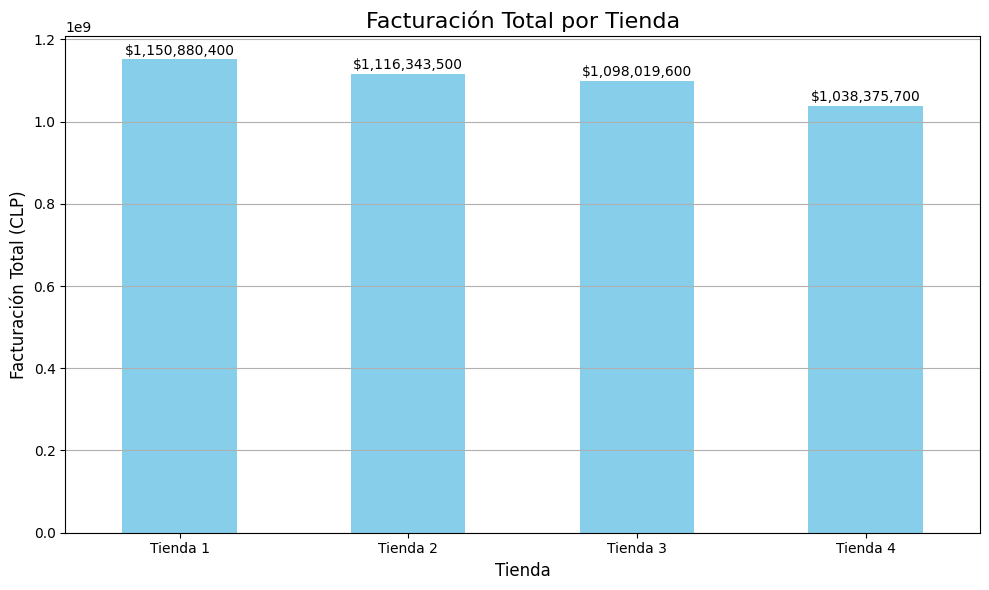

In [ ]:
#Graficar sin decimales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
facturacion_por_tienda.plot(kind="bar", color="skyblue")
plt.title("Facturación Total por Tienda", fontsize=16)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Facturación Total (CLP)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Añadir etiquetas de valor entero encima de cada barra
for i, valor in enumerate(facturacion_por_tienda):
    plt.text(i, valor + max(facturacion_por_tienda)*0.01, f"${valor:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [10]:
# Asegurémonos de que los nombres de las columnas están correctos
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Agrupar por tienda y categoría, y sumar el precio
ventas_categoria_tienda = df.groupby(['tienda', 'categoría_del_producto'])['precio'].sum().reset_index()

# Mostrar los primeros resultados
print(ventas_categoria_tienda)


      tienda   categoría_del_producto       precio
0   Tienda 1  Artículos para el hogar   12698400.0
1   Tienda 1     Deportes y diversión   39290000.0
2   Tienda 1        Electrodomésticos  363685200.0
3   Tienda 1             Electrónicos  429493500.0
4   Tienda 1   Instrumentos musicales   91299000.0
5   Tienda 1                 Juguetes   17995700.0
6   Tienda 1                   Libros    8784900.0
7   Tienda 1                  Muebles  187633700.0
8   Tienda 2  Artículos para el hogar   14746900.0
9   Tienda 2     Deportes y diversión   34744500.0
10  Tienda 2        Electrodomésticos  348567800.0
11  Tienda 2             Electrónicos  410831100.0
12  Tienda 2   Instrumentos musicales  104990300.0
13  Tienda 2                 Juguetes   15945400.0
14  Tienda 2                   Libros   10091200.0
15  Tienda 2                  Muebles  176426300.0
16  Tienda 3  Artículos para el hogar   15060000.0
17  Tienda 3     Deportes y diversión   35593100.0
18  Tienda 3        Electrodomé

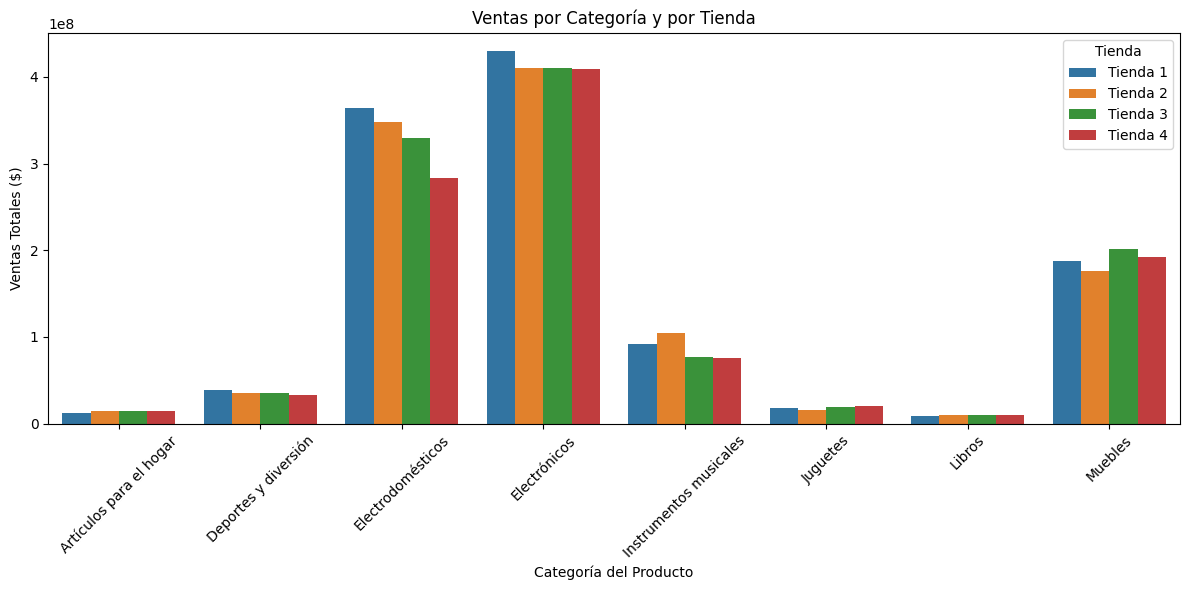

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_categoria_tienda, x='categoría_del_producto', y='precio', hue='tienda')

# Ajustes visuales
plt.title('Ventas por Categoría y por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Tienda')
plt.show()


In [17]:
# Calcular el porcentaje de participación por categoría
ventas_totales_por_categoria = ventas_categoria_tienda.groupby('categoría_del_producto')['precio'].transform('sum')
ventas_categoria_tienda['porcentaje_participacion'] = (ventas_categoria_tienda['precio'] / ventas_totales_por_categoria) * 100
ventas_totales_por_categoria
ventas_categoria_tienda

,tienda,categoría_del_producto,precio,porcentaje_participacion
0,Tienda 1,Artículos para el hogar,12698400.0,22.053567
1,Tienda 1,Deportes y diversión,39290000.0,27.479810
2,Tienda 1,Electrodomésticos,363685200.0,27.453097
3,Tienda 1,Electrónicos,429493500.0,25.864120
4,Tienda 1,Instrumentos musicales,91299000.0,26.177228
5,Tienda 1,Juguetes,17995700.0,24.449218
6,Tienda 1,Libros,8784900.0,23.304533
7,Tienda 1,Muebles,187633700.0,24.764862
8,Tienda 2,Artículos para el hogar,14746900.0,25.611239
9,Tienda 2,Deportes y diversión,34744500.0,24.300643


# 3. Calificación promedio de la tienda


In [18]:
calificacion_promedio = df.groupby('tienda')['calificación'].mean().reset_index()
print(calificacion_promedio)


     tienda  calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


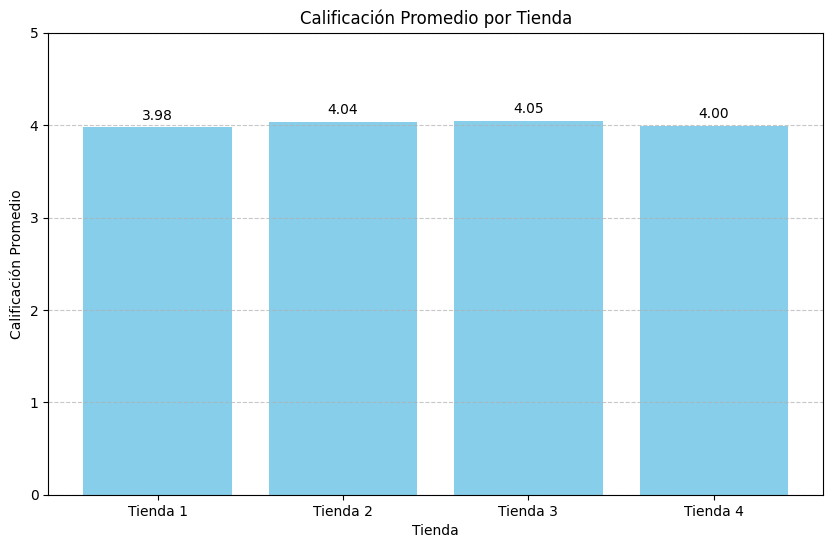

In [21]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10,6))
barras = plt.bar(calificacion_promedio['tienda'], calificacion_promedio['calificación'], color='skyblue')

# Títulos y etiquetas
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 0.05,  # posición un poco sobre la barra
        f'{altura:.2f}',  # formato con 2 decimales
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.show()



# 4. Productos más y menos vendidos

In [23]:
# Agrupar por tienda y producto para contar cuántas veces se vendió cada uno
ventas_por_producto = df.groupby(['tienda', 'producto']).size().reset_index(name='CantidadVendida')

# Obtener el producto más vendido por tienda
mas_vendido_por_tienda = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmax()]

# Obtener el producto menos vendido por tienda
menos_vendido_por_tienda = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmin()]

print("✅ Producto más vendido por tienda:")
print(mas_vendido_por_tienda)

print("\n🔻 Producto menos vendido por tienda:")
print(menos_vendido_por_tienda)


✅ Producto más vendido por tienda:
       tienda                   producto  CantidadVendida
1    Tienda 1                    Armario               60
75   Tienda 2  Iniciando en programación               65
129  Tienda 3              Kit de bancas               57
163  Tienda 4                   Cama box               62

🔻 Producto menos vendido por tienda:
       tienda                   producto  CantidadVendida
4    Tienda 1  Auriculares con micrófono               33
77   Tienda 2              Juego de mesa               32
111  Tienda 3    Bloques de construcción               35
175  Tienda 4         Guitarra eléctrica               33


In [24]:
# Unir con el DataFrame original para obtener el precio
mas_vendido_con_precio = pd.merge(mas_vendido_por_tienda, df[['tienda', 'producto', 'precio']], on=['tienda', 'producto'], how='left').drop_duplicates(subset=['tienda', 'producto'])
menos_vendido_con_precio = pd.merge(menos_vendido_por_tienda, df[['tienda', 'producto', 'precio']], on=['tienda', 'producto'], how='left').drop_duplicates(subset=['tienda', 'producto'])

print("✅ Precio del producto más vendido por tienda:")
print(mas_vendido_con_precio)

print("\n🔻 Precio del producto menos vendido por tienda:")
print(menos_vendido_con_precio)

✅ Precio del producto más vendido por tienda:
       tienda                   producto  CantidadVendida    precio
0    Tienda 1                    Armario               60  513400.0
60   Tienda 2  Iniciando en programación               65   58600.0
125  Tienda 3              Kit de bancas               57  336000.0
182  Tienda 4                   Cama box               62  473800.0

🔻 Precio del producto menos vendido por tienda:
       tienda                   producto  CantidadVendida    precio
0    Tienda 1  Auriculares con micrófono               33  143600.0
33   Tienda 2              Juego de mesa               32  153000.0
65   Tienda 3    Bloques de construcción               35   34700.0
100  Tienda 4         Guitarra eléctrica               33  626200.0


In [27]:
import pandas as pd

# Agrupar por tienda y producto para contar cuántas veces se vendió cada uno
ventas_por_producto = df.groupby(['tienda', 'producto']).size().reset_index(name='CantidadVendida')

# Producto más vendido por tienda
mas_vendido = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmax()]
mas_vendido = mas_vendido.rename(columns={'producto': 'Producto_Más_Vendido'})

# Producto menos vendido por tienda
menos_vendido = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['CantidadVendida'].idxmin()]
menos_vendido = menos_vendido.rename(columns={'producto': 'Producto_Menos_Vendido'})

# Envío promedio por tienda
envio_promedio = df.groupby('tienda')['costo_de_envío'].mean().reset_index()
envio_promedio['costo_de_envío'] = envio_promedio['costo_de_envío'].round(2)

# Unir todo en una tabla resumen
tabla_resumen = mas_vendido[['tienda', 'Producto_Más_Vendido']].merge(
    menos_vendido[['tienda', 'Producto_Menos_Vendido']], on='tienda'
).merge(envio_promedio, on='tienda')

# Mostrar resultado
print("\n📊 Tabla resumen por tienda:")
print(tabla_resumen)



📊 Tabla resumen por tienda:
     tienda       Producto_Más_Vendido     Producto_Menos_Vendido  \
0  Tienda 1                    Armario  Auriculares con micrófono   
1  Tienda 2  Iniciando en programación              Juego de mesa   
2  Tienda 3              Kit de bancas    Bloques de construcción   
3  Tienda 4                   Cama box         Guitarra eléctrica   

   costo_de_envío  
0        26018.61  
1        25216.24  
2        24805.68  
3        23459.46  


# 5. Envío promedio por tienda

In [25]:
# Calcular el envío promedio por tienda
envio_promedio = df.groupby('tienda')['costo_de_envío'].mean().reset_index()

# Redondear a dos decimales
envio_promedio['costo_de_envío'] = envio_promedio['costo_de_envío'].round(2)

print("\n🚚 Envío promedio por tienda:")
print(envio_promedio)



🚚 Envío promedio por tienda:
     tienda  costo_de_envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


In [28]:
# Agrupar datos clave por tienda
facturacion = df.groupby('tienda')['facturacion'].sum()
envio_total = df.groupby('tienda')['costo_de_envío'].sum()
ventas_totales = df.groupby('tienda').size()
calificacion_prom = df.groupby('tienda')['calificación'].mean()

# Crear DataFrame resumen
rentabilidad = pd.DataFrame({
    'Facturación': facturacion,
    'Costo_Envio_Total': envio_total,
    'Productos_Vendidos': ventas_totales,
    'Calificación_Promedio': calificacion_prom
})

# Calcular indicadores
rentabilidad['Margen_Estimado'] = rentabilidad['Facturación'] - rentabilidad['Costo_Envio_Total']
rentabilidad['Rentabilidad_Relativa'] = rentabilidad['Margen_Estimado'] / rentabilidad['Productos_Vendidos']
rentabilidad['Costo_Envio_por_Producto'] = rentabilidad['Costo_Envio_Total'] / rentabilidad['Productos_Vendidos']

# Mostrar ordenado por menor rentabilidad
rentabilidad_ordenada = rentabilidad.sort_values(by='Rentabilidad_Relativa')
print("🏪 Tiendas ordenadas por menor rentabilidad:\n")
print(rentabilidad_ordenada)


🏪 Tiendas ordenadas por menor rentabilidad:

          Facturación  Costo_Envio_Total  Productos_Vendidos  \
tienda                                                         
Tienda 4   1038375700         55317400.0                2358   
Tienda 3   1098019600         58516600.0                2359   
Tienda 2   1116343500         59485100.0                2359   
Tienda 1   1150880400         61377900.0                2359   

          Calificación_Promedio  Margen_Estimado  Rentabilidad_Relativa  \
tienda                                                                    
Tienda 4               3.995759     9.830583e+08          416903.435115   
Tienda 3               4.048326     1.039503e+09          440654.090716   
Tienda 2               4.037304     1.056858e+09          448011.191183   
Tienda 1               3.976685     1.089502e+09          461849.300551   

          Costo_Envio_por_Producto  
tienda                              
Tienda 4              23459.457167  
Tienda 3

In [30]:
df['utilidad'] = df['precio'] - df['costo_de_envío']

utilidad_por_tienda = df.groupby('tienda')['utilidad'].sum().astype(int).sort_values(ascending=False)

print(utilidad_por_tienda)


tienda
Tienda 1    1089502500
Tienda 2    1056858400
Tienda 3    1039503000
Tienda 4     983058300
Name: utilidad, dtype: int64


In [31]:
import pandas as pd

# Asegurarnos que los nombres de columnas están limpios y en formato estándar
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calcular utilidad por fila (venta)
df['utilidad'] = df['precio'] - df['costo_de_envío']

# Agrupar por tienda y calcular métricas clave
resumen_tiendas = df.groupby('tienda').agg(
    facturacion_total = ('precio', 'sum'),
    costo_envio_total = ('costo_de_envío', 'sum'),
    utilidad_total = ('utilidad', 'sum'),
    productos_vendidos = ('producto', 'count'),
    calificacion_promedio = ('calificación', 'mean')
).reset_index()

# Convertir números relevantes a enteros para mejor análisis (facturación, costo, utilidad, productos)
resumen_tiendas['facturacion_total'] = resumen_tiendas['facturacion_total'].astype(int)
resumen_tiendas['costo_envio_total'] = resumen_tiendas['costo_envio_total'].astype(int)
resumen_tiendas['utilidad_total'] = resumen_tiendas['utilidad_total'].astype(int)
resumen_tiendas['productos_vendidos'] = resumen_tiendas['productos_vendidos'].astype(int)

# Ordenar por utilidad total ascendente para ver la menos rentable primero
resumen_ordenado = resumen_tiendas.sort_values(by='utilidad_total')

print("📉 Tiendas ordenadas de menos a más rentable:\n")
print(resumen_ordenado)


📉 Tiendas ordenadas de menos a más rentable:

     tienda  facturacion_total  costo_envio_total  utilidad_total  \
3  Tienda 4         1038375700           55317400       983058300   
2  Tienda 3         1098019600           58516600      1039503000   
1  Tienda 2         1116343500           59485100      1056858400   
0  Tienda 1         1150880400           61377900      1089502500   

   productos_vendidos  calificacion_promedio  
3                2358               3.995759  
2                2359               4.048326  
1                2359               4.037304  
0                2359               3.976685  


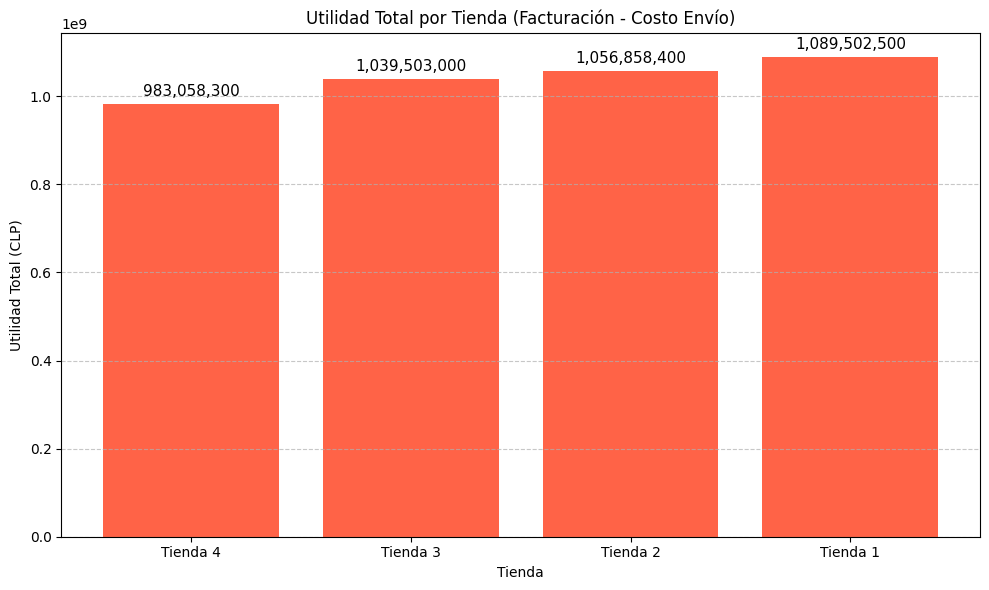

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
barras = plt.bar(resumen_ordenado['tienda'], resumen_ordenado['utilidad_total'], color='tomato')

plt.title('Utilidad Total por Tienda (Facturación - Costo Envío)')
plt.xlabel('Tienda')
plt.ylabel('Utilidad Total (CLP)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + max(resumen_ordenado['utilidad_total'])*0.01,
        f'{altura:,}',
        ha='center',
        va='bottom',
        fontsize=11,
        color='black'
    )

plt.tight_layout()
plt.show()


# Reporte de Rentabilidad de Tiendas

Estimado Sr. Juan,

Luego de analizar la información de ventas, costos y calificaciones, hemos determinado cuál es la tienda menos rentable según los datos disponibles.

En este reporte encontrará un resumen de la facturación, costos, utilidad y otros indicadores clave para cada tienda.

---

A continuación, se presenta el análisis detallado.


In [33]:
# Suponiendo que 'resumen_ordenado' es el DataFrame con el análisis que hicimos antes

# Mostrar la tabla resumen
print(resumen_ordenado)

# Extraer la tienda menos rentable (la primera fila después de ordenar por utilidad)
menos_rentable = resumen_ordenado.iloc[0]

mensaje = f"""
La tienda menos rentable es **{menos_rentable['tienda']}** con una utilidad total de ${menos_rentable['utilidad_total']:,} CLP.

Esta tienda tiene una facturación total de ${menos_rentable['facturacion_total']:,} CLP, un costo total de envío de ${menos_rentable['costo_envio_total']:,} CLP,
vendió {menos_rentable['productos_vendidos']} productos y tiene una calificación promedio de {menos_rentable['calificacion_promedio']:.2f}.

Se recomienda analizar estrategias para mejorar la rentabilidad de esta tienda.
"""

from IPython.display import Markdown
display(Markdown(mensaje))


     tienda  facturacion_total  costo_envio_total  utilidad_total  \
3  Tienda 4         1038375700           55317400       983058300   
2  Tienda 3         1098019600           58516600      1039503000   
1  Tienda 2         1116343500           59485100      1056858400   
0  Tienda 1         1150880400           61377900      1089502500   

   productos_vendidos  calificacion_promedio  
3                2358               3.995759  
2                2359               4.048326  
1                2359               4.037304  
0                2359               3.976685  



La tienda menos rentable es **Tienda 4** con una utilidad total de $983,058,300 CLP.

Esta tienda tiene una facturación total de $1,038,375,700 CLP, un costo total de envío de $55,317,400 CLP, 
vendió 2358 productos y tiene una calificación promedio de 4.00.

Se recomienda analizar estrategias para mejorar la rentabilidad de esta tienda.
